<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/cluster_karate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

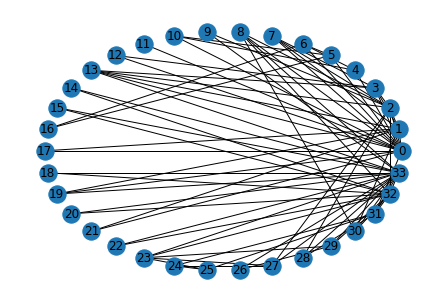

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.karate_club_graph()

#G.remove_nodes_from(range(10,G.number_of_nodes()))   #work on a smaller subset?

nx.draw_circular(G, with_labels=True)
plt.show()

A = nx.adjacency_matrix(G)
A_dense = A.todense()
print(A_dense)

In [ ]:
#Adj matrix is sparse, but AgglomerativeClustering wants a dense/full matrix
G.number_of_edges()


78

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 3, affinity = "precomputed", linkage = "average")
clustering.fit(1-A_dense)   #1-A simply flips the entries of A so that the distance of two vertices
#is set to 0 if there is an edge between them. And, set to 1 if there is no edge.
#But maybe something like a shortest path analysis can also be performed to have a spectrum of affinity values
#rather than just 0 or 1.

print(clustering.labels_)


[0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 2 2 1 1 2 1 1 2 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


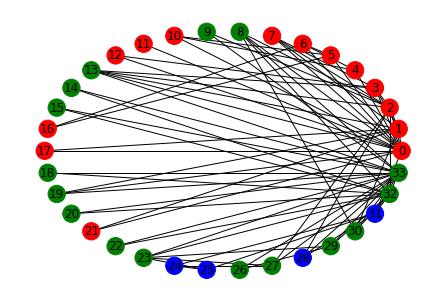

In [ ]:
cluster_color = {0:'r', 1:'g', 2:'b'}

if False:     #if you like to build the colors list with append.
  colors = []
  for i,v in enumerate(G.nodes):
    color = cluster_color[clustering.labels_[i]]
    colors.append(color)
else:
  colors = [cluster_color[clustering.labels_[i]] for i,v in enumerate(G.nodes)]
  #instead of range(34), I used enumerate just in case
  #because that would be definitely matching with the order of nodes used in the adjacency matrix

nx.draw_circular(G, with_labels=True, node_color=colors)
plt.show()


In [ ]:
groundtruth = [0]*10 + [2]*10 + [1]*14   #lets make up a groundtruth for the 34 nodes

from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(clustering.labels_, groundtruth)

#rand_score is not good enough, alwys go with adjusted!
#groundtruth = list(range(34))
#rand_score(clustering.labels_, groundtruth)


0.16270970951604433